# Cloud Statistics

In [1]:
import geemap
import subprocess
import ee
import eerepr
import os
import pandas as pd
import ipywidgets as widgets
from bqplot import pyplot as plt
from ipyleaflet import WidgetControl
geemap.set_proxy(port=10809)
ee.Initialize()

D:\Wrz\anaconda\envs\GEE\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Map = geemap.Map(center=[34, 99], zoom=4, add_google_map=True)
China_city = ee.FeatureCollection('projects/ee-mrwurenzhe/assets/China_city_utf8')
vis_params = {
    'color': '000000',
    'colorOpacity': 1,
    'pointSize': 3,
    'pointShape': 'circle',
    'width': 2,
    'lineType': 'solid',
    'fillColorOpacity': 0.66,
}
palette = ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']
Map.add_styled_vector(
    China_city, column="FIRST_省�", palette=palette, layer_name="China Counties", **vis_params) # column="地市"
# Map.addLayer(China_city, {}, 'China Counties')

# 藏东南四市，注意这样获得的feature不能够进行可视化，因为仍然是featture类型却拥有feature_collection的特征
# 故更改Feature-->FeatureCollection
# Southest_Tibetan = ee.Feature(
#     China_city.filter(ee.Filter.Or(ee.Filter.eq('地市', "林芝市"),ee.Filter.eq('地市', "山南市"),
#                                   ee.Filter.eq('地市', "昌都市"),ee.Filter.eq('地市', "拉萨市"))))
# Southest_Tibetan = ee.Feature(China_city.filter(ee.Filter.inList('地市',ee.List(["林芝市", "昌都市","山南市","拉萨市"]))))

Southest_Tibetan = ee.FeatureCollection(China_city.filter(ee.Filter.inList('地市',ee.List(["林芝市", "昌都市","山南市","拉萨市"]))))
Map.addLayer(Southest_Tibetan, {}, 'Southest_Tibetan')
Map

Map(center=[34, 99], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

## 查看FeatureCollection中所有地市名称

In [ ]:
China_city.reduceColumns(ee.Reducer.toList(),["地市"])

In [ ]:
try :
    roi = Map.draw_features[0]
except:
    roi = Southest_Tibetan.union()

In [3]:
roi = Southest_Tibetan.union()

## Landsat

In [ ]:
L8_T1_TOA = ee.ImageCollection("LANDSAT/LM01/C02/T1").filterBounds(roi.geometry())

In [ ]:
# L8_T1_TOA.first().propertyNames()  
CLOUD_COVER = L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["CLOUD_COVER"]).get("list").getInfo()
CLOUD_COVER_LAND = L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["CLOUD_COVER_LAND"]).get("list").getInfo()
DATE_ACQUIRED =  L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["DATE_ACQUIRED"]).get("list").getInfo()
UTM_ZONE = L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["UTM_ZONE"]).get("list").getInfo()
WRS_PATH = L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["WRS_PATH"]).get("list").getInfo()
WRS_ROW = L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["WRS_ROW"]).get("list").getInfo()
Systemindex = L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["system:index"]).get("list").getInfo()
# DATE_PRODUCT_GENERATED = L8_T1_TOA.reduceColumns(ee.Reducer.toList(),["DATE_PRODUCT_GENERATED"]).get("list").getInfo()
# DATE_PRODUCT_GENERATED = [ee.Date(each).format("YYYY-MM-dd").getInfo() for each in DATE_PRODUCT_GENERATED]

In [ ]:
def Create_Pandas(**args):
    return pd.DataFrame(args)
Pd_DataFrame = Create_Pandas(CLOUD_COVER =CLOUD_COVER,
              CLOUD_COVER_LAND=CLOUD_COVER_LAND,DATE_ACQUIRED=DATE_ACQUIRED,
             UTM_ZONE=UTM_ZONE,WRS_PATH=WRS_PATH,WRS_ROW=WRS_ROW,Systemindex=Systemindex)#,D,DATE_PRODUCT_GENERATED=DATE_PRODUCT_GENERATED

In [ ]:
Pd_DataFrame.to_csv(r'E:\Desktop\Rs_journal\L01MSS_C2T1L2_SR.csv')

## Sentinel-SR

In [ ]:
Sentinel2_T1_SR = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED").filterBounds(roi.geometry()).filterDate('2022-01-01', '2023-01-01')

In [ ]:
CLOUDY_PIXEL_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["CLOUDY_PIXEL_PERCENTAGE"]).get("list").getInfo()
CLOUD_COVERAGE_ASSESSMENT = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["CLOUD_COVERAGE_ASSESSMENT"]).get("list").getInfo()
# CLOUD_SHADOW_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["CLOUD_SHADOW_PERCENTAGE"]).get("list").getInfo()
# HIGH_PROBA_CLOUDS_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["HIGH_PROBA_CLOUDS_PERCENTAGE"]).get("list").getInfo()
MEAN_SOLAR_AZIMUTH_ANGLE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["MEAN_SOLAR_AZIMUTH_ANGLE"]).get("list").getInfo()
MEAN_SOLAR_ZENITH_ANGLE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["MEAN_SOLAR_ZENITH_ANGLE"]).get("list").getInfo()
# MEDIUM_PROBA_CLOUDS_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["MEDIUM_PROBA_CLOUDS_PERCENTAGE"]).get("list").getInfo()
# NODATA_PIXEL_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["NODATA_PIXEL_PERCENTAGE"]).get("list").getInfo()
# NOT_VEGETATED_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["NOT_VEGETATED_PERCENTAGE"]).get("list").getInfo()
# SNOW_ICE_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["SNOW_ICE_PERCENTAGE"]).get("list").getInfo()
# THIN_CIRRUS_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["THIN_CIRRUS_PERCENTAGE"]).get("list").getInfo()
# VEGETATION_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["VEGETATION_PERCENTAGE"]).get("list").getInfo()
# WATER_PERCENTAGE = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["WATER_PERCENTAGE"]).get("list").getInfo()
Systemindex = Sentinel2_T1_SR.reduceColumns(ee.Reducer.toList(),["system:index"]).get("list").getInfo()

In [ ]:
def Create_Pandas(**args):
    return pd.DataFrame(args)
Pd_DataFrame = Create_Pandas(CLOUDY_PIXEL_PERCENTAGE=CLOUDY_PIXEL_PERCENTAGE,
              CLOUD_COVERAGE_ASSESSMENT=CLOUD_COVERAGE_ASSESSMENT,CLOUD_SHADOW_PERCENTAGE=CLOUD_SHADOW_PERCENTAGE,
             HIGH_PROBA_CLOUDS_PERCENTAGE=HIGH_PROBA_CLOUDS_PERCENTAGE,MEAN_SOLAR_AZIMUTH_ANGLE=MEAN_SOLAR_AZIMUTH_ANGLE,
            MEAN_SOLAR_ZENITH_ANGLE=MEAN_SOLAR_ZENITH_ANGLE,MEDIUM_PROBA_CLOUDS_PERCENTAGE=MEDIUM_PROBA_CLOUDS_PERCENTAGE,
                            NODATA_PIXEL_PERCENTAGE=NODATA_PIXEL_PERCENTAGE,NOT_VEGETATED_PERCENTAGE=NOT_VEGETATED_PERCENTAGE,
                            SNOW_ICE_PERCENTAGE=SNOW_ICE_PERCENTAGE,THIN_CIRRUS_PERCENTAGE=THIN_CIRRUS_PERCENTAGE,
                            VEGETATION_PERCENTAGE=VEGETATION_PERCENTAGE,WATER_PERCENTAGE=WATER_PERCENTAGE,
                            Systemindex=Systemindex)

In [ ]:
Pd_DataFrame.to_csv(r'E:\Desktop\Rs_journal\S2_L2A_SR_22.csv')

## Sentinel-TOA

In [12]:
Sentinel2_T1_TOA = ee.ImageCollection("COPERNICUS/S2_HARMONIZED").filterBounds(roi.geometry()).filterDate('2022-01-01', '2023-01-01')

In [13]:
CLOUDY_PIXEL_PERCENTAGE = Sentinel2_T1_TOA.reduceColumns(ee.Reducer.toList(),["CLOUDY_PIXEL_PERCENTAGE"]).get("list").getInfo()
CLOUD_COVERAGE_ASSESSMENT = Sentinel2_T1_TOA.reduceColumns(ee.Reducer.toList(),["CLOUD_COVERAGE_ASSESSMENT"]).get("list").getInfo()
MEAN_SOLAR_AZIMUTH_ANGLE = Sentinel2_T1_TOA.reduceColumns(ee.Reducer.toList(),["MEAN_SOLAR_AZIMUTH_ANGLE"]).get("list").getInfo()
MEAN_SOLAR_ZENITH_ANGLE = Sentinel2_T1_TOA.reduceColumns(ee.Reducer.toList(),["MEAN_SOLAR_ZENITH_ANGLE"]).get("list").getInfo()
Systemindex = Sentinel2_T1_TOA.reduceColumns(ee.Reducer.toList(),["system:index"]).get("list").getInfo()

In [14]:
def Create_Pandas(**args):
    return pd.DataFrame(args)
Pd_DataFrame = Create_Pandas(CLOUDY_PIXEL_PERCENTAGE=CLOUDY_PIXEL_PERCENTAGE,
              CLOUD_COVERAGE_ASSESSMENT=CLOUD_COVERAGE_ASSESSMENT,MEAN_SOLAR_AZIMUTH_ANGLE=MEAN_SOLAR_AZIMUTH_ANGLE,
            MEAN_SOLAR_ZENITH_ANGLE=MEAN_SOLAR_ZENITH_ANGLE,Systemindex=Systemindex)

In [15]:
Pd_DataFrame.to_csv(r'E:\Desktop\Rs_journal\S2_L1C_TOA_22.csv')

# CSV合并
按顺序合并一个文件夹中的所有CSV文件

In [42]:
Dir = r'E:\Desktop\Rs_journal\S2_L2A_SR'
CSV_Paths = sorted([os.path.join(Dir,f) for f in os.listdir(Dir) if f.endswith('.csv')],key=lambda info: int(info.split('_')[-1].split('.')[0]))
for i,each in enumerate(CSV_Paths):
    if i == 0:
        DataFrame = pd.read_csv(each)
    else:
        DataFrame = pd.concat([DataFrame, pd.read_csv(each)], axis=0, ignore_index=True)
DataFrame.to_csv(os.path.join(Dir,os.path.basename(Dir)+'_ALL.csv'))
print('=={}== is saved'.format(os.path.join(Dir,os.path.basename(Dir)+'_ALL.csv')))

In [48]:
DataFrame.head(10)

,Unnamed: 0,CLOUDY_PIXEL_PERCENTAGE,CLOUD_COVERAGE_ASSESSMENT,CLOUD_SHADOW_PERCENTAGE,HIGH_PROBA_CLOUDS_PERCENTAGE,MEAN_SOLAR_AZIMUTH_ANGLE,MEAN_SOLAR_ZENITH_ANGLE,MEDIUM_PROBA_CLOUDS_PERCENTAGE,NODATA_PIXEL_PERCENTAGE,NOT_VEGETATED_PERCENTAGE,SNOW_ICE_PERCENTAGE,THIN_CIRRUS_PERCENTAGE,VEGETATION_PERCENTAGE,WATER_PERCENTAGE,Systemindex
0,0,86.579939,86.579939,0.422118,80.556136,159.045797,54.617464,6.023803,94.515306,0.360174,6.818132,0.000000,0.346926,0.011312,20181214T040141_20181214T040614_T47RLM
1,1,46.629231,46.629231,3.444717,37.698048,160.122222,54.314654,8.931182,5.643979,13.320494,5.318099,0.000000,12.208481,0.220743,20181214T040141_20181214T040614_T47RMM
2,2,9.505359,9.505359,1.235486,0.406014,160.268900,55.182833,9.099346,25.427961,38.301545,2.924032,0.000000,27.085665,0.521541,20181214T040141_20181214T040614_T47RMN
3,3,27.596579,27.596579,1.313108,0.468651,160.407713,56.051929,27.127928,46.247086,32.639039,2.265304,0.000000,20.091064,0.316699,20181214T040141_20181214T040614_T47RMP
4,4,21.791597,21.791597,6.693710,0.610146,160.538775,56.921399,21.181451,66.780072,19.908156,5.812453,0.000000,21.039028,0.339455,20181214T040141_20181214T040614_T47RMQ
5,5,18.903568,18.903568,0.379157,0.053049,161.354782,54.890466,18.850519,0.000265,34.583881,0.091254,0.000000,31.012574,0.322896,20181214T040141_20181214T040614_T47RNN
6,6,53.787834,53.787834,2.458905,1.328964,161.494010,55.761550,52.458870,0.000999,13.686405,4.502356,0.000000,10.151763,0.367179,20181214T040141_20181214T040614_T47RNP
7,7,0.260257,0.260257,0.003981,0.001136,158.673625,52.970247,0.117641,49.491143,31.571388,0.000000,0.141479,52.108848,3.381146,20181215T042149_20181215T042612_T46RDQ
8,8,7.194223,7.194223,4.872518,5.612803,158.847031,53.832846,1.545657,70.210105,0.860547,0.637353,0.035762,76.332462,0.117634,20181215T042149_20181215T042612_T46RDR
9,9,53.825006,53.825006,6.225794,35.839781,159.011445,54.696035,17.985225,90.828639,1.832282,10.295168,0.000000,10.135921,0.200705,20181215T042149_20181215T042612_T46RDS


(array([2906., 1797., 1836., 1934., 2148., 2329., 2662., 3144., 3841.,
        5711.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

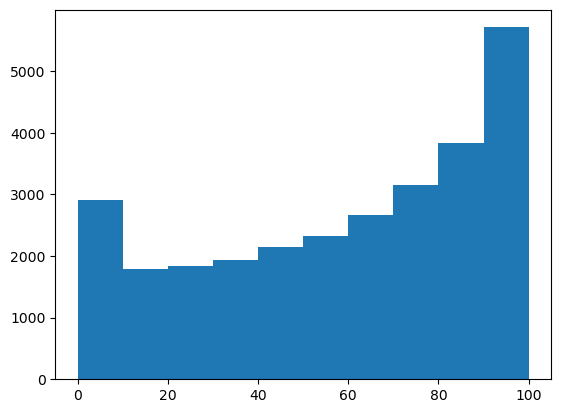

In [50]:
import matplotlib.pyplot as plt 
plt.hist(DataFrame['CLOUDY_PIXEL_PERCENTAGE'])